In [1]:
import pandas as pd
import numpy as np

import matplotlib

import matplotlib.pyplot as plt

from pandas.tools.plotting import scatter_matrix

matplotlib.style.use('ggplot')
%matplotlib inline  


In [2]:
#dataset column names
col_names = ["id","cycle","setting1","setting2","setting3","s1","s2","s3","s4","s5","s6","s7","s8","s9","s10","s11","s12","s13","s14","s15","s16","s17","s18","s19","s20","s21"]

In [3]:
#load training data into dataframe
df_tr_raw = pd.read_csv('data/PM_train.txt', sep = ' ', header=None)


In [4]:
#drop extra space columnn
df_tr_raw.drop([26,27], axis=1, inplace='True')

In [5]:
#assign column names
df_tr_raw.columns = col_names

In [6]:
df_tr_raw.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [7]:
df_tr_raw.tail()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,...,519.30,2388.26,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522


In [8]:
df_tr_raw.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [9]:

def make_labels (df_in, period):
    
    #create regression label
    
    #make a dataframe to hold the last cycle for each enginge in the dataset
    df_max_cycle = pd.DataFrame(df_in.groupby('id')['cycle'].max())
    df_max_cycle.reset_index(level=0, inplace=True)
    df_max_cycle.columns = ['id', 'last_cycle']
    
    #add time-to-failure ttf as a new column - regression label
    df_in = pd.merge(df_in, df_max_cycle, on='id')
    df_in['ttf'] = df_in['last_cycle'] - df_in['cycle']
    df_in.drop(['last_cycle'], axis=1, inplace='True')
    
    #create binary classification label
    df_in['label_bnc'] = df_in['ttf'].apply(lambda x: 1 if x <= period else 0)
    
    #create multi-class classification label
    df_in['label_mcc'] = df_in['ttf'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)
    
    return df_in
    

In [10]:
#add labels to training data
df_tr_lbl = make_labels(df_tr_raw, 30)

In [11]:
sensor_cols = ["s1","s2","s3","s4","s5","s6","s7","s8","s9","s10","s11","s12","s13","s14","s15","s16","s17","s18","s19","s20","s21"]

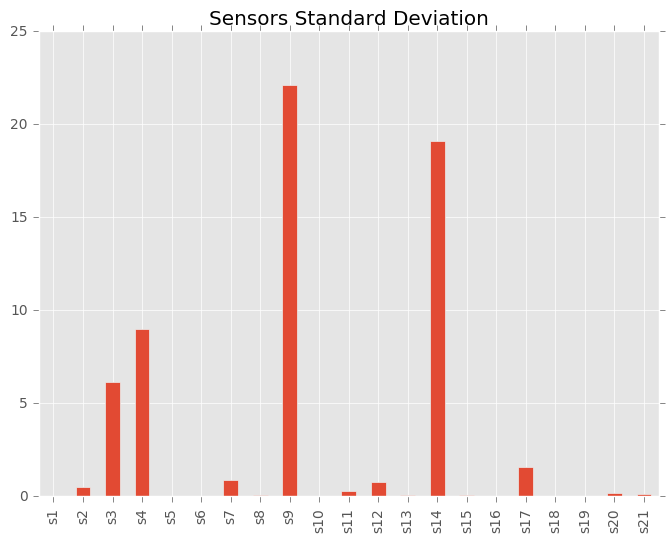

In [12]:
df_tr_lbl[sensor_cols].std().plot(kind='bar', figsize=(8,6), title="Sensors Standard Deviation")

In [13]:
#select top 9 sensors based on variance
sen_top_var = df_tr_lbl[sensor_cols].var().sort_values(ascending=False)[0:9].index.tolist()

#add regression lable ttf to the list of top sensors
sen_top_lbl = sen_top_var + ['ttf']
sen_top_lbl

['s9', 's14', 's4', 's3', 's17', 's7', 's12', 's2', 's11', 'ttf']

s9        Axes(0.125,0.125;0.065678x0.775)
s14    Axes(0.203814,0.125;0.065678x0.775)
s4     Axes(0.282627,0.125;0.065678x0.775)
s3     Axes(0.361441,0.125;0.065678x0.775)
s17    Axes(0.440254,0.125;0.065678x0.775)
s7     Axes(0.519068,0.125;0.065678x0.775)
s12    Axes(0.597881,0.125;0.065678x0.775)
s2     Axes(0.676695,0.125;0.065678x0.775)
s11    Axes(0.755508,0.125;0.065678x0.775)
ttf    Axes(0.834322,0.125;0.065678x0.775)
dtype: object

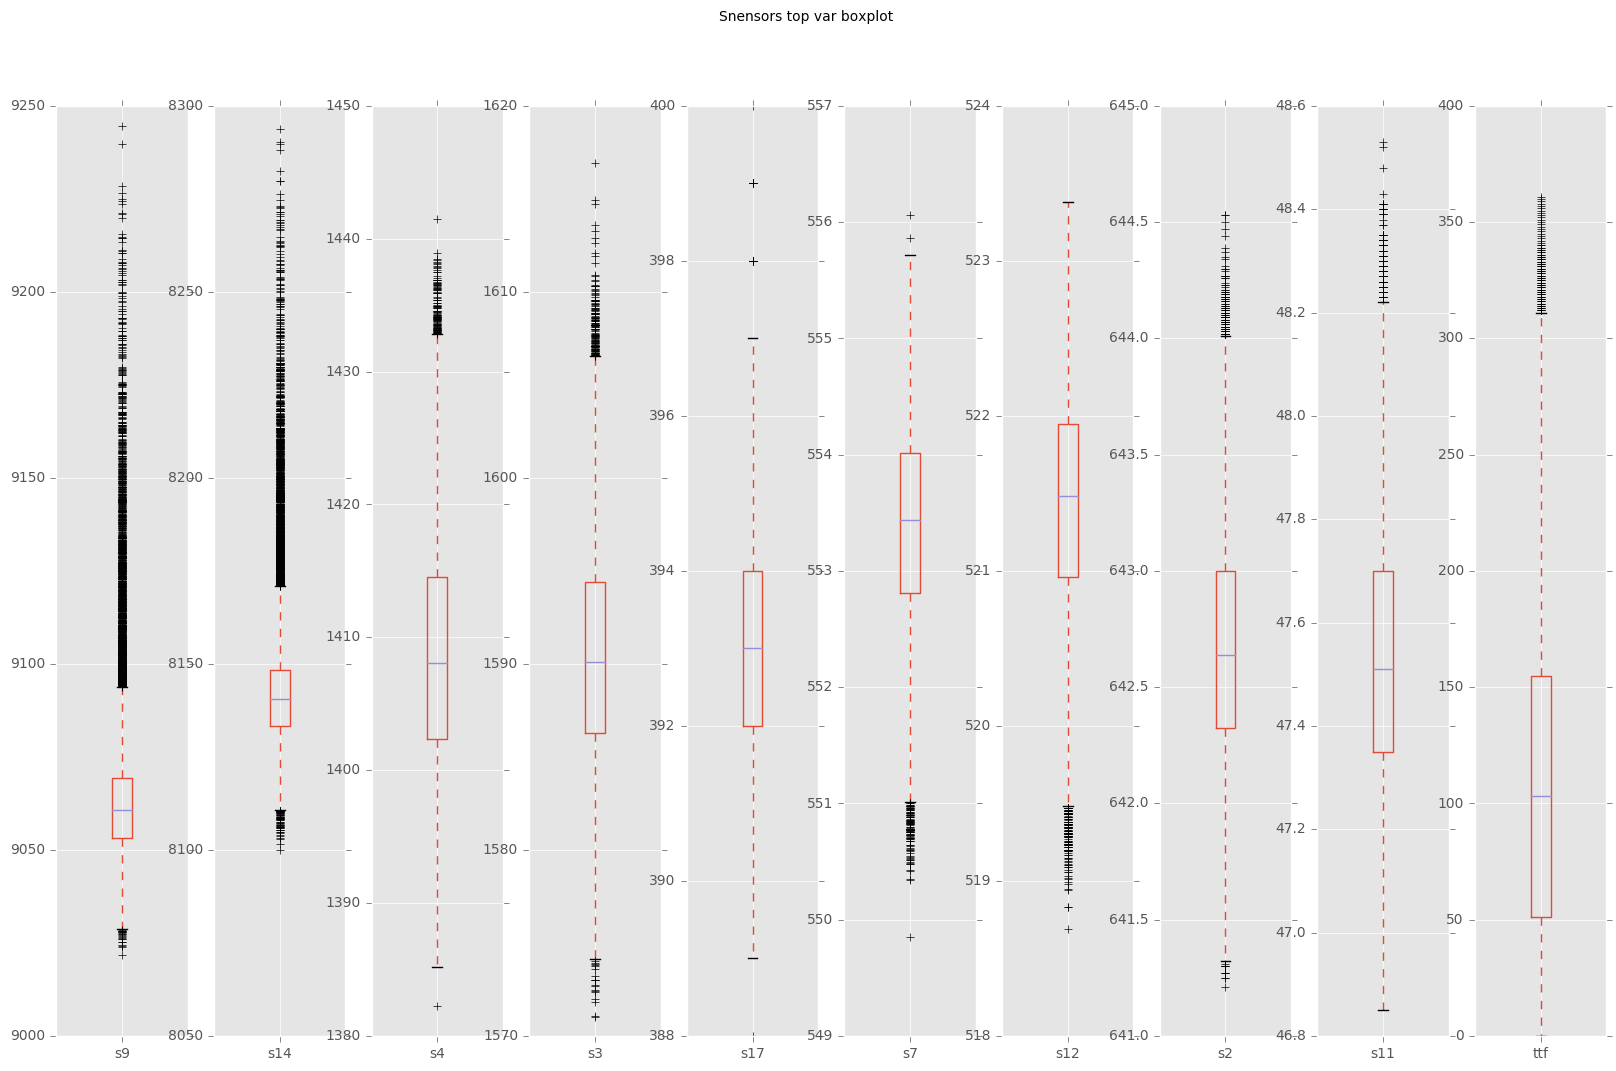

In [14]:
df_tr_lbl[sen_top_lbl].plot(kind ='box', figsize=(20,12), subplots='True', title='Snensors top var boxplot')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C094470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F635EB8>]], dtype=object)

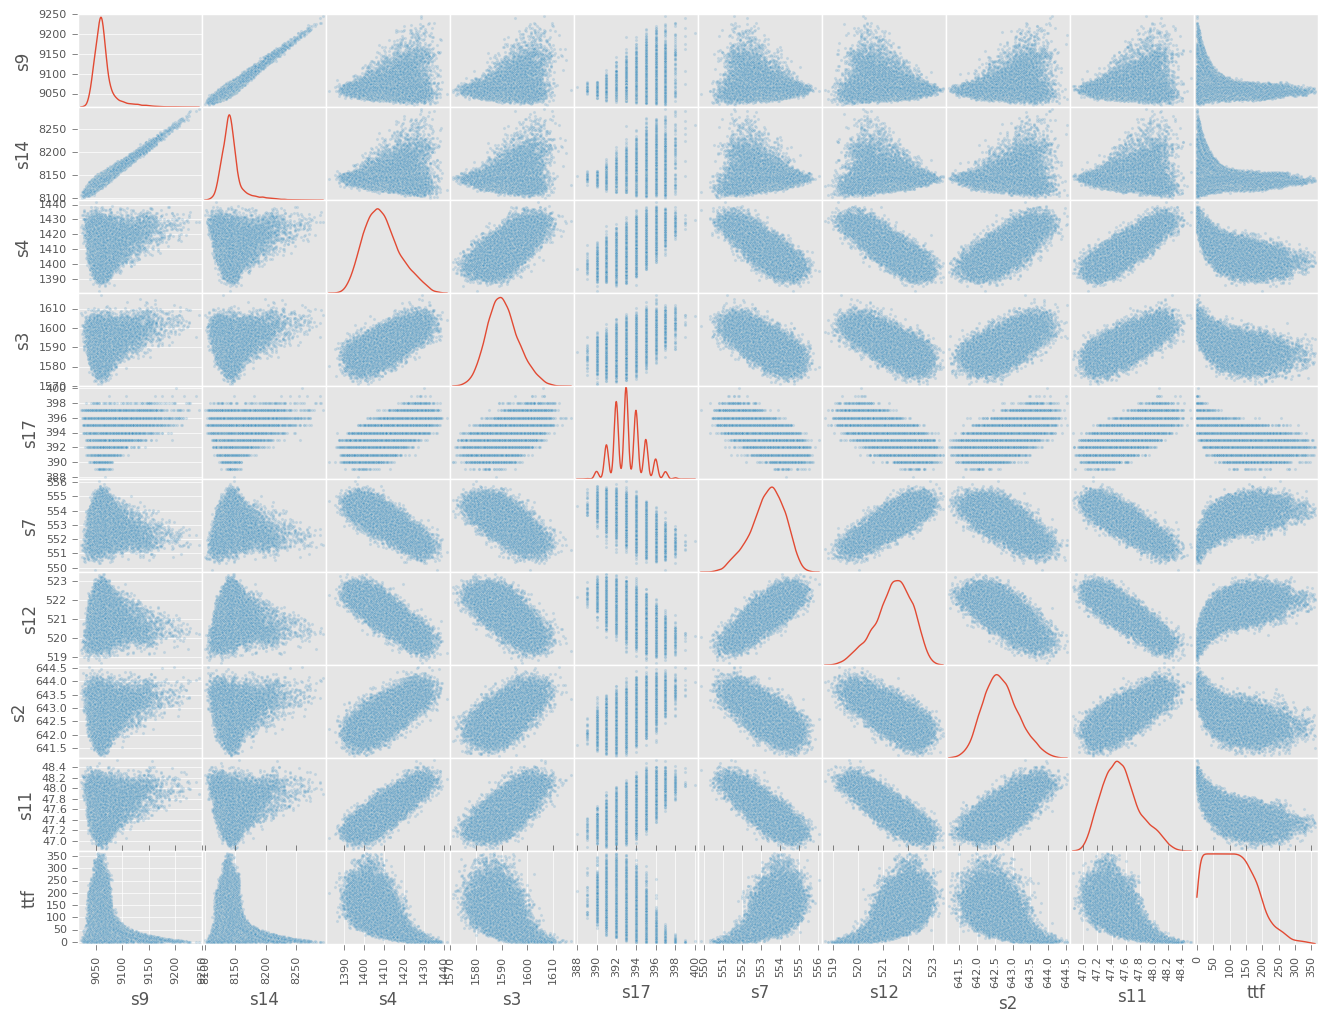

In [15]:
scatter_matrix(df_tr_lbl[sen_top_lbl], alpha=0.2, figsize=(16, 12), diagonal='kde')

In [16]:
def explore_col(s, e):
    
    fig = plt.figure(figsize=(10, 8))


    sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
    sub1.set_title(s +' histogram') # non OOP: plt.title('The function f')
    sub1.hist(df_tr_lbl[s])

    sub2 = fig.add_subplot(222)
    sub2.set_title(s +' boxplot')
    sub2.boxplot(df_tr_lbl[s])
    
    #np.random.seed(12345)
    
    if e > 100 or e <= 0:
        select_engines = list(pd.unique(df_tr_lbl.id))
    else:
        select_engines = np.random.choice(range(1,101), e, replace=False)
        
    sub3 = fig.add_subplot(223)
    sub3.set_title(s +' time series / cycle')
    for i in select_engines:
        df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == i]
        sub3.plot(df['cycle'],df[s])
    
    sub4 = fig.add_subplot(224)
    sub4.set_title("scatter of "+ s + " vs. ttf (regression label)")
    sub4.scatter(df_tr_lbl['ttf'],df_tr_lbl[s])


    plt.tight_layout()
    plt.show()

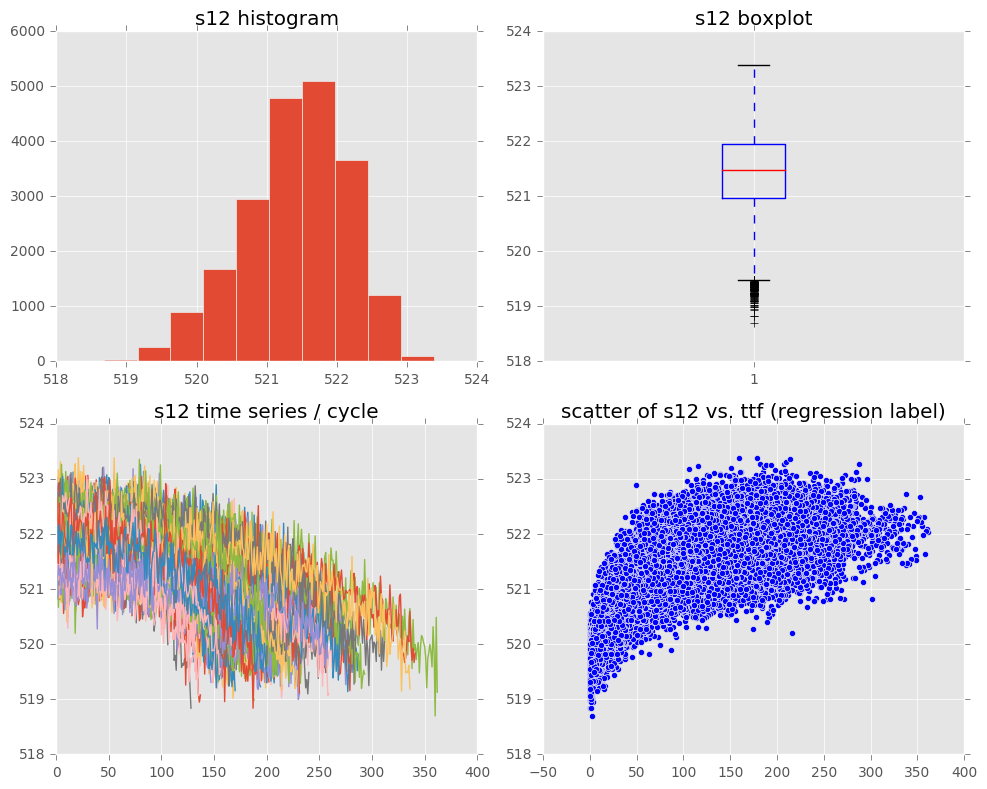

In [17]:
explore_col("s12", 0)

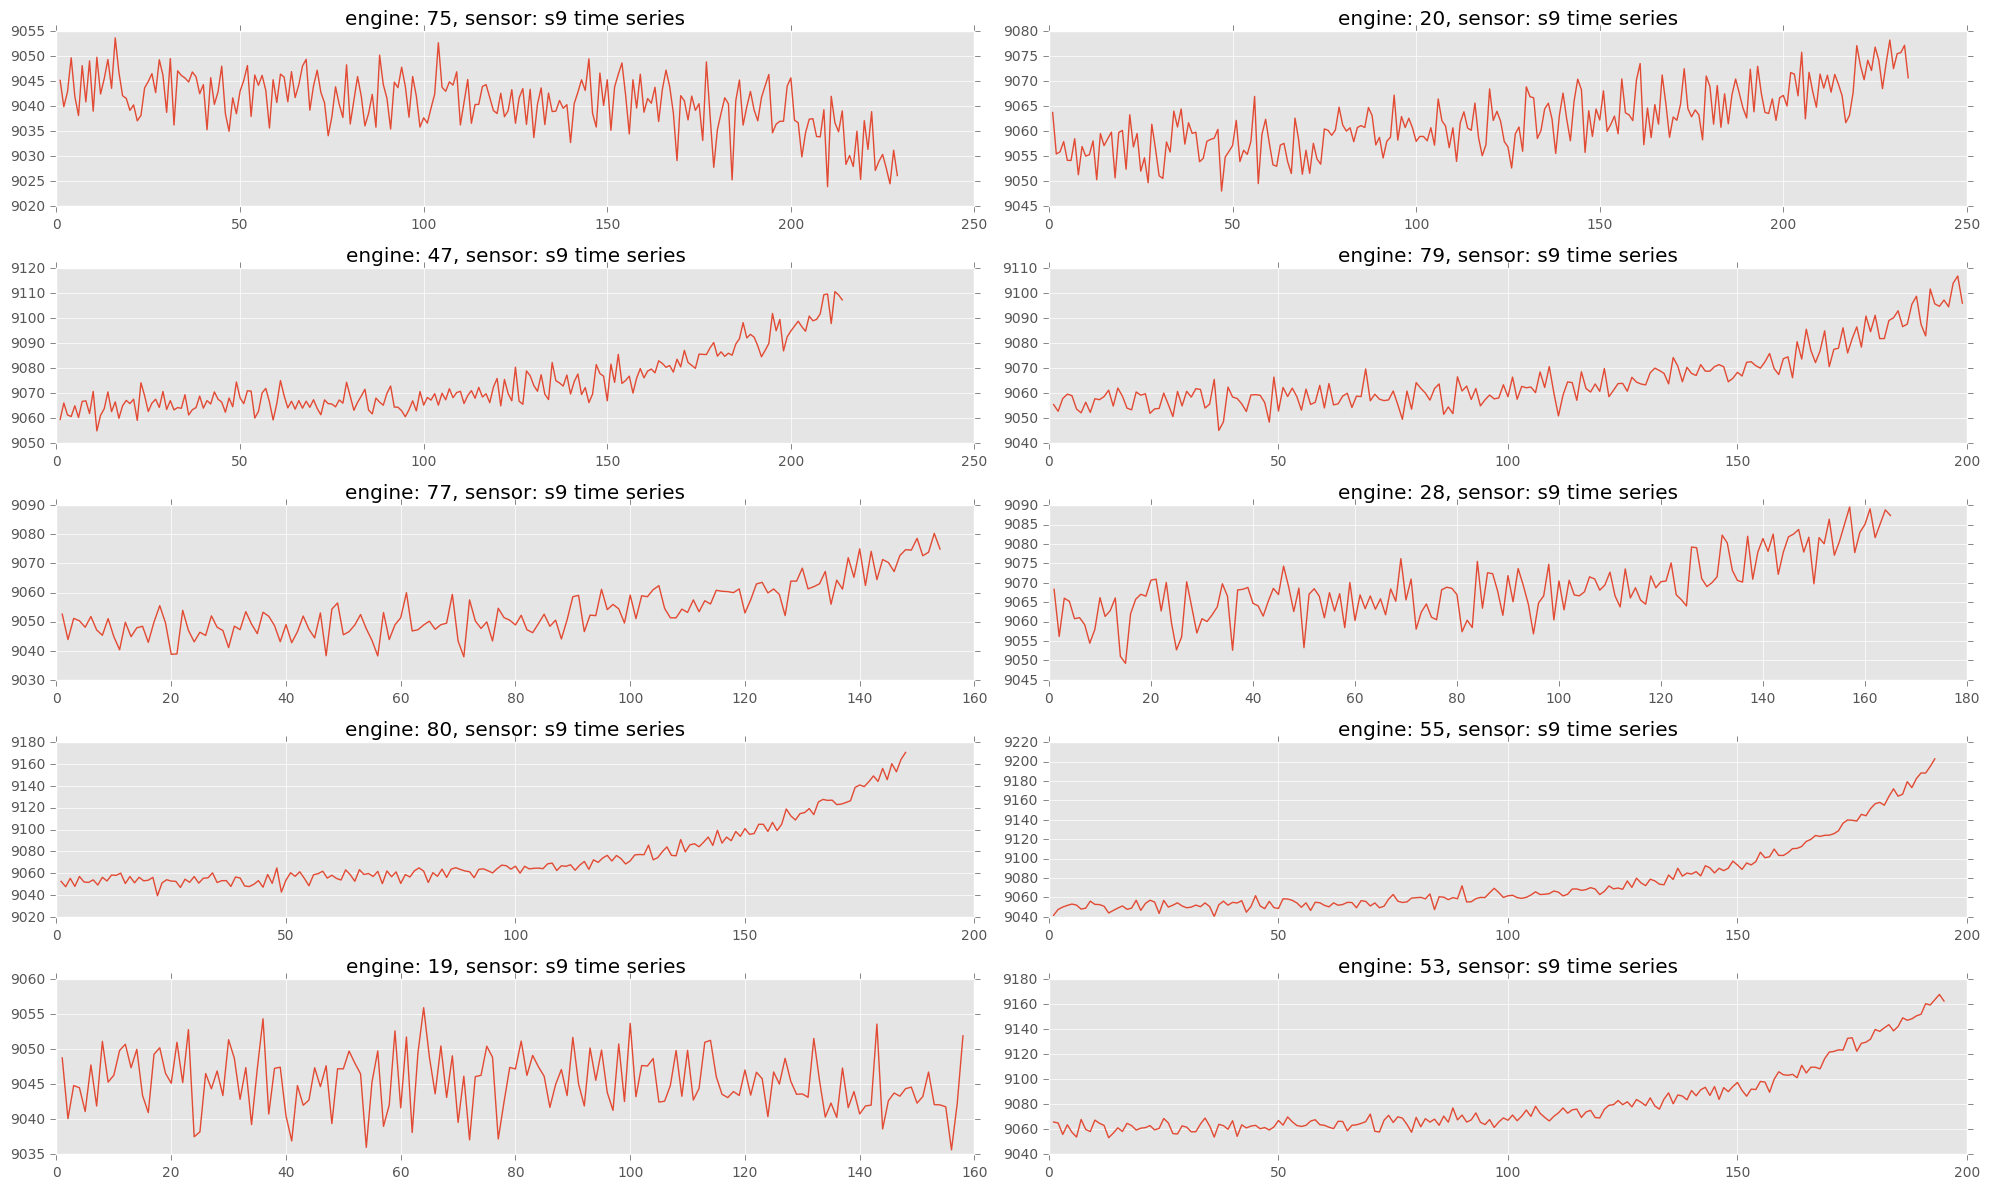

In [18]:
fig = plt.figure(figsize=(20, 12))
s = 's9'

select_engines = np.random.choice(range(1,101), 10, replace=False).tolist()

for m_id in select_engines:
    df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == m_id]
    sub = fig.add_subplot(5, 2 ,select_engines.index(m_id)+1)
    sub.set_title("engine: " + str(m_id) + ", sensor: " + s + " time series")
    sub.plot(df['cycle'],df[s])

plt.tight_layout()
plt.show()




In [19]:
def make_features(df_in, sel_cols, rolling_win_size):
    
    sensor_av_cols = [nm.replace('s', 'av') for nm in sensor_cols]
    sensor_sd_cols = [nm.replace('s', 'sd') for nm in sensor_cols]
    df_out = pd.DataFrame()
    
    ws = rolling_win_size
    
    #calculate rolling stats for each engine id
    
    for m_id in pd.unique(df_in.id):
    
        # get a subset for each engine sensors
        df_sub = df_in[df_in.id == m_id][sel_cols]

    
        # get rolling mean for the subset
        av = df_sub_sensor.rolling(ws, min_periods=1).mean()
        av.columns = sensor_av_cols
    
        # get the rolling standard deviation for the subset
        sd = df_sub_sensor.rolling(ws, min_periods=1).std().fillna(0)
        #sd[sd.isnull()] = 0
        #sd.fillna(0)
        sd.columns = sensor_sd_cols
    
        # combine the two new subset dataframes columns to the engine subset
        new_ftrs = pd.concat([df_sub,av,sd], axis=1)
    
        # add the new features rows to the output dataframe
        df_out = pd.concat([df_out,new_ftrs])
        
    return df_out
